In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import scipy.stats
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#from sklearn import preprocessing
#import sklearn.metrics.pairwise as pairwise
from sklearn.manifold import MDS

from fastdtw import fastdtw

#import re


plt.style.use('ggplot')

In [10]:
df = pd.read_csv("input/djia/dow_jones_index.data")
df['close'] = df['close'].apply(lambda x: float(x[1:]))
df['date'] = df['date'].apply(lambda x: datetime.datetime(int(x.split('/')[2]), int(x.split('/')[0]), int(x.split('/')[1])))
df['stock'] = df['stock'].apply(lambda x: str(x))
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [13]:
df_pivot = df.pivot(index='stock', columns='date', values='close').reset_index()
df_pivot.tail()

date,stock,2011-01-07 00:00:00,2011-01-14 00:00:00,2011-01-21 00:00:00,2011-01-28 00:00:00,2011-02-04 00:00:00,2011-02-11 00:00:00,2011-02-18 00:00:00,2011-02-25 00:00:00,2011-03-04 00:00:00,...,2011-04-21 00:00:00,2011-04-29 00:00:00,2011-05-06 00:00:00,2011-05-13 00:00:00,2011-05-20 00:00:00,2011-05-27 00:00:00,2011-06-03 00:00:00,2011-06-10 00:00:00,2011-06-17 00:00:00,2011-06-24 00:00:00
25,TRV,53.33,54.63,55.00,55.81,57.41,58.99,60.92,59.60,59.18,...,61.32,63.28,63.43,62.33,62.25,61.52,61.18,59.21,57.92,56.68
26,UTX,79.08,79.08,80.20,81.43,82.52,85.20,85.01,83.37,82.86,...,87.10,89.58,89.21,88.98,87.50,86.33,83.24,82.70,84.57,84.33
27,VZ,35.93,35.46,34.95,35.63,36.31,36.39,36.62,35.97,36.08,...,36.91,37.78,37.28,37.26,37.15,36.67,35.63,35.19,35.51,36.00
28,WMT,54.08,54.81,55.73,56.70,56.03,55.69,55.38,51.75,52.07,...,53.58,54.98,55.02,55.72,55.29,54.70,53.66,52.72,52.82,52.41
29,XOM,75.59,77.84,78.98,78.99,83.28,82.82,84.50,85.34,85.08,...,86.36,87.98,82.69,80.87,81.57,82.63,81.18,79.78,79.02,76.78


c:\Users\eddho\Projects\data\mastering_predictive_analytics\env\Lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\eddho\Projects\data\mastering_predictive_analytics\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='1', ylabel='0'>

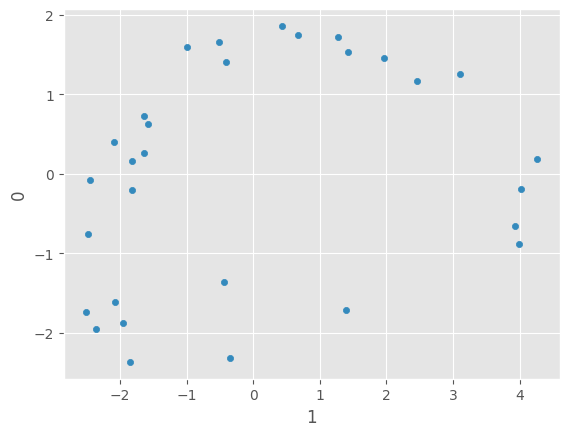

In [17]:
corr = np.corrcoef(np.float64(np.array(df_pivot)[:,2:]))
mds_coords = MDS().fit_transform(corr)
pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0)

<Axes: xlabel='0', ylabel='1'>

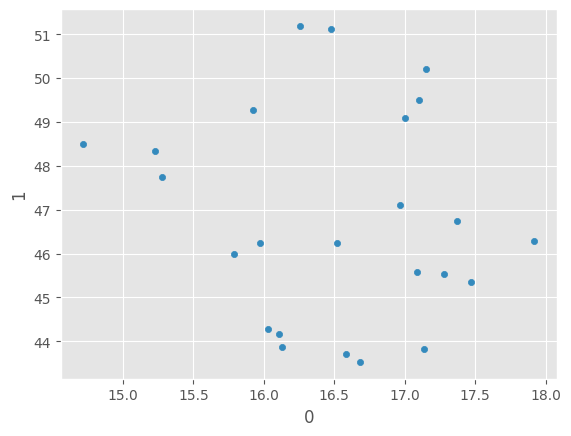

In [18]:
df_pivot.iloc[0:2].transpose().iloc[2:].plot(kind='scatter', x=0, y=1)

c:\Users\eddho\Projects\data\mastering_predictive_analytics\env\Lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\eddho\Projects\data\mastering_predictive_analytics\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='1', ylabel='0'>

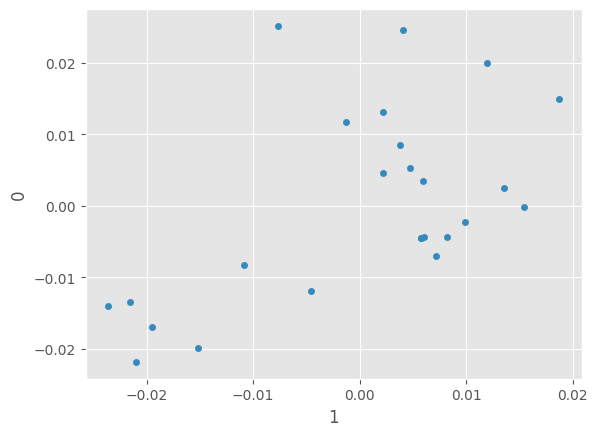

In [21]:
corr2 = scipy.stats.spearmanr(np.float64(np.array(df_pivot)[:,1:]))
mds_coords = MDS().fit_transform(corr2.correlation)
pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0)

In [23]:
dtw_matrix = np.zeros(shape=(df_pivot.shape[0], df_pivot.shape[0]))

for i in np.arange(0, df_pivot.shape[0]):
    for j in np.arange(i+1, df_pivot.shape[0]):
        dtw_matrix[i,j] = fastdtw(df_pivot.iloc[i,2:], df_pivot.iloc[j,2:])[0]

In [24]:
dtw_matrix += dtw_matrix.transpose()

c:\Users\eddho\Projects\data\mastering_predictive_analytics\env\Lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
c:\Users\eddho\Projects\data\mastering_predictive_analytics\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='1', ylabel='0'>

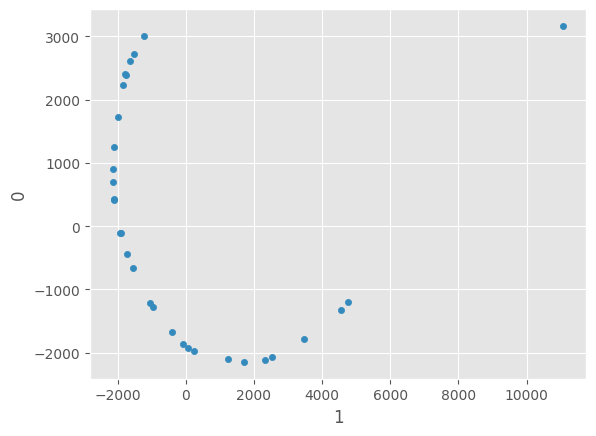

In [26]:
mds_coords = MDS().fit_transform(dtw_matrix)
pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0)